# <center> **Caminata aleatoria de Pearson**

# El problema de la Caminata Aleatoria

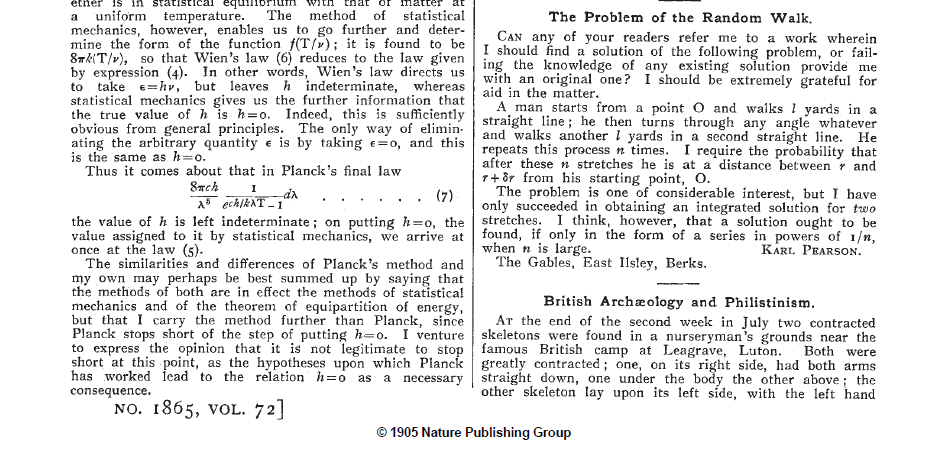

# Respuesta de Rayleigh

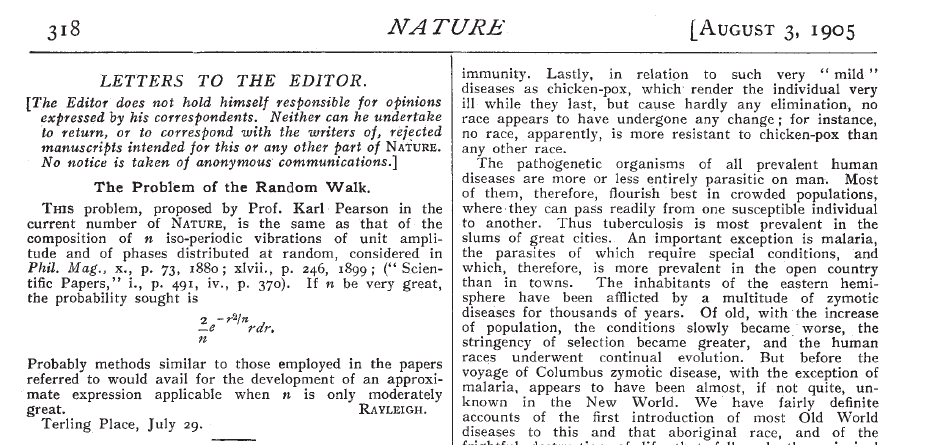

# **Solución:**

Sea 
$$ \overrightarrow{R}_n = \overrightarrow{r}_1 +  \overrightarrow{r}_2 + ... +  \overrightarrow{r}_n $$

donde los componentes de $ \overrightarrow{r}_i $
\begin{equation}
\overrightarrow{r}_x = l cos(\theta_i)\\
\end{equation}
\begin{equation}
\overrightarrow{r}_y = l sen(\theta_i)  
\end{equation}

y

\begin{equation}
\overrightarrow{R}_x = l \sum_{i=1}^{n} cos(\theta_i)
\end{equation}
\begin{equation}
\overrightarrow{R}_y = l \sum_{i=1}^{n} sen(\theta_i)  
\end{equation}

$$R_n = |R_n| = \sqrt{\overrightarrow{R}_x + \overrightarrow{R}_y} $$


In [53]:
import pandas as pd
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [108]:
# Pearson Random Walk function
def PearsonRandomWalk(nsteps, l=1):
  rx = [0]*(nsteps+1)
  ry = [0]*(nsteps+1)
  for i in range(1, nsteps+1): 
    theta = uniform(low=0, high=2*np.pi, size=1)[0]
    rx[i] = l*np.cos(theta)
    ry[i] = l*np.sin(theta)
  rx = np.array(rx)
  ry = np.array(ry)  
  Rx = rx.cumsum()
  Ry = ry.cumsum()
  R2 = Rx**2 + Ry**2 
  R = np.sqrt(R2)

  return rx, ry, Rx, Ry, R2, R

In [109]:
nsteps = 1000
npaths = 8000
# multiple paths
rxs, rys, Rxs, Rys, R2s, Rs = [], [], [], [], [], []
# loop
for i in range(npaths):
  rx, ry, Rx, Ry, R2, R = PearsonRandomWalk(nsteps)
  rxs.append(rx)
  rys.append(ry)
  Rxs.append(Rx)
  Rys.append(Ry)
  R2s.append(R2)
  Rs.append(R)

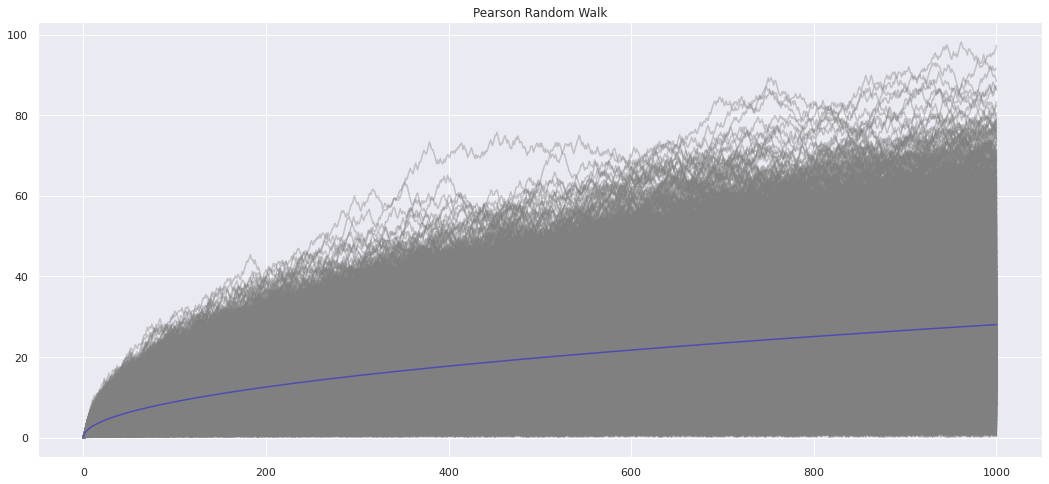

In [110]:
x = np.array([*range(nsteps+1)])
plt.figure(figsize=(18,8))
for r in Rs:
  plt.plot(x, r, '-', color='grey', alpha=0.4)
plt.plot(x, np.sqrt(x/2)*np.sqrt(np.pi/2), '-', color='blue', alpha=0.4)
plt.title('Pearson Random Walk')
plt.show()

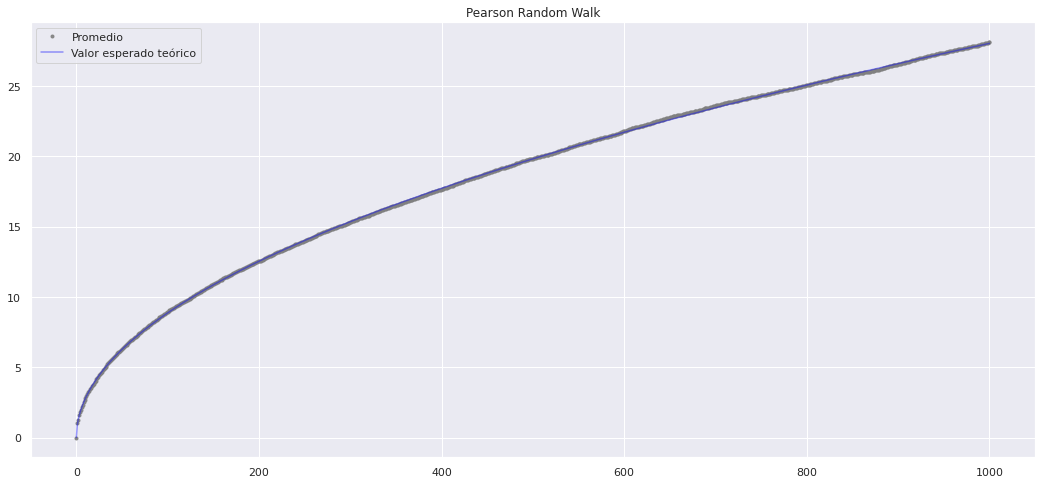

In [111]:
x = np.array([*range(nsteps+1)])
plt.figure(figsize=(18,8))
plt.plot(np.array(Rs).mean(axis=0) , '.', color='grey', alpha=0.9, label='Promedio')
plt.plot(x, np.sqrt(x/2)*np.sqrt(np.pi/2), '-', color='blue', alpha=0.4, label='Valor esperado teórico')
plt.title('Pearson Random Walk')
plt.legend()
plt.show()

# Distribución de $R_n$

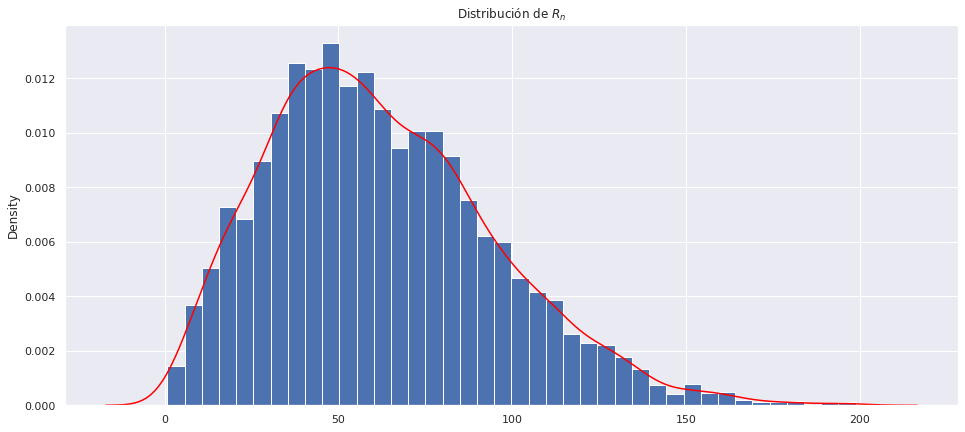

In [7]:
Rn = [r[nsteps] for r in Rs]
plt.figure(figsize=(16,7))
sns.kdeplot(Rn, color='red')
plt.hist(Rn, bins=40, density=True)
plt.title('Distribución de $R_n$')
plt.show()


# Distribución de $\overrightarrow{R}_x$ 

$$\overrightarrow{R}_x \sim N(0, n/2)$$

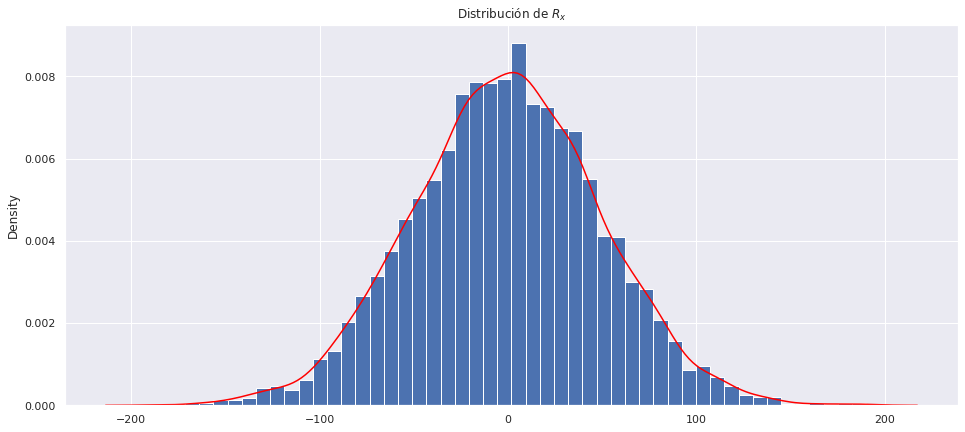

In [8]:
Rx = [rx[nsteps] for rx in Rxs]
plt.figure(figsize=(16,7))
sns.kdeplot(Rx, color='red')
plt.hist(Rx, bins=50, density=True)
plt.title('Distribución de $R_x$')
plt.show()

# Distribución de $\overrightarrow{R}_y$ 

$$\overrightarrow{R}_y \sim N(0, n/2)$$

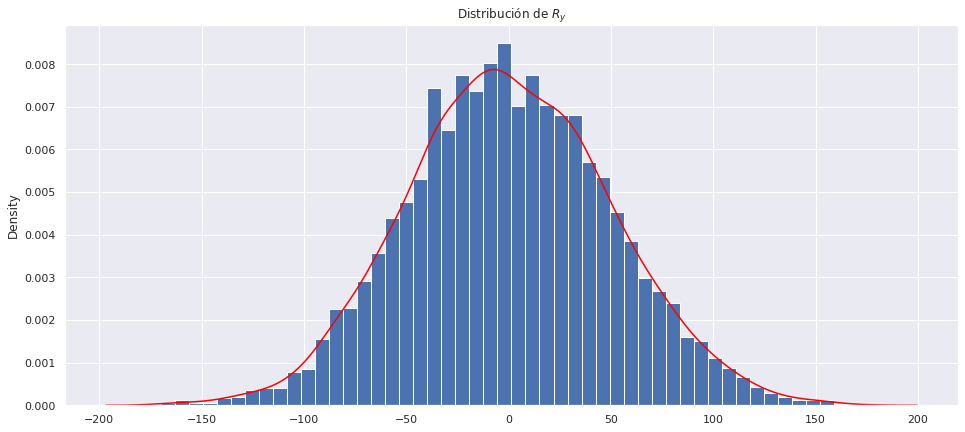

In [9]:
Ry = [ry[nsteps] for ry in Rys]
plt.figure(figsize=(16,7))
sns.kdeplot(Ry, color='red')
plt.hist(Ry, bins=50, density=True)
plt.title('Distribución de $R_y$')
plt.show()

# Distribución de $R_n^2$

Sea $W= R_n^2 = \overrightarrow{R}_x^2 + \overrightarrow{R}_y^2$, entonces du distribución viene dada por

\begin{equation}
f_W(w) = \frac{1}{n} \exp\{- \frac{w}{n}\}, \ \ \ w>0
\end{equation}

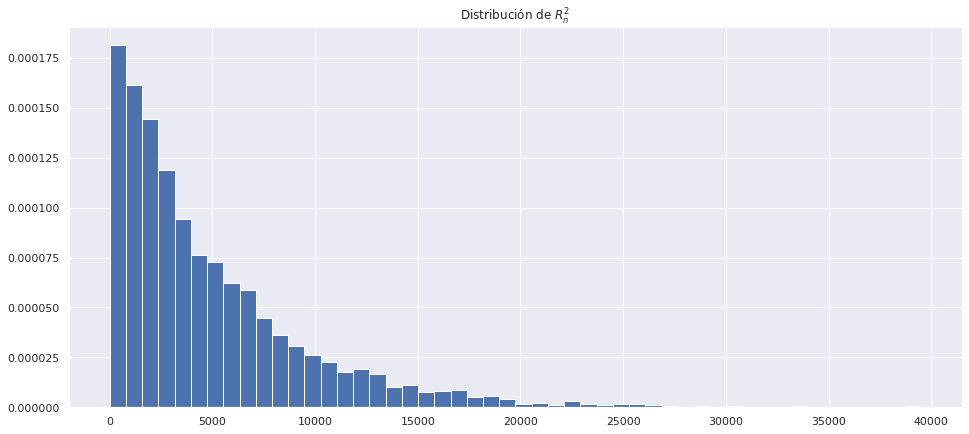

In [10]:
R2 = [r2[nsteps] for r2 in R2s]
plt.figure(figsize=(16,7))
plt.hist(R2, bins=50, density=True)
plt.title('Distribución de $R_n^2$')
plt.show()

# Trayectoria del Caminante 

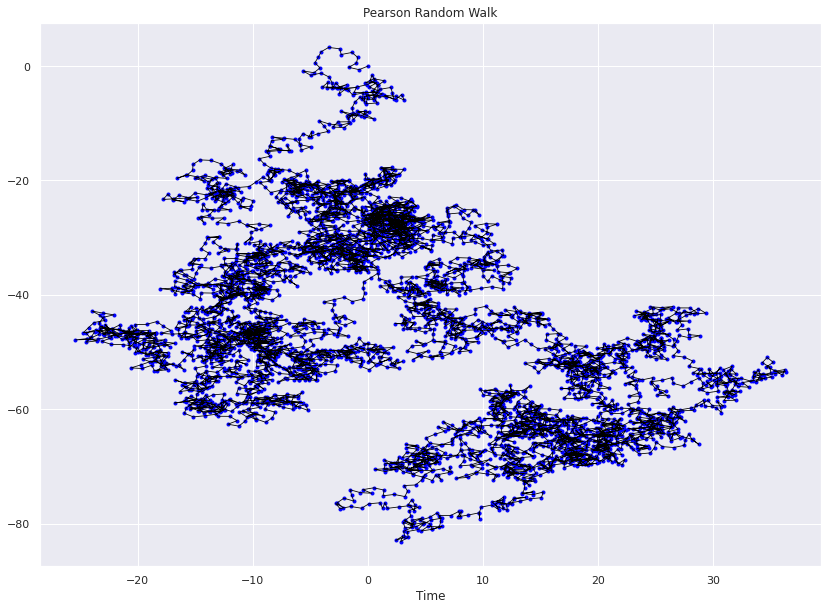

In [16]:
plt.figure(figsize=(14,10))
plt.plot(Rxs[1], Rys[1], 'o', color='blue', markersize=3)
plt.plot(Rxs[1], Rys[1], color='black', linewidth=0.8)
plt.title('Pearson Random Walk')
plt.xlabel('Time')
#mplcyberpunk.add_glow_effects()
plt.show()